In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Data Import
path_folder = '/home/minyoungxi/MINYOUNGXI/SMC/10196714/'
file_name = '10196714_221019.npy'

WAVE = np.load(path_folder + 'WAVE_' +file_name)
BP = np.load(path_folder + 'BP_' +file_name,'').squeeze()
SQI = np.load(path_folder + 'SQI_' +file_name).squeeze()
CO = np.load(path_folder + 'CO_' +file_name)
NIBP = np.load(path_folder + 'NIBP_' +file_name)
ECG, PPG, ABP, t = WAVE[0,:], WAVE[1,:], WAVE[2,:], WAVE[3,:]
CO, tCO = CO[0,:], CO[1,:]
NIBP, tNIBP = NIBP[0,:], NIBP[1,:]

# Decode for BP & Rpeak
idx_Rpeak = np.array(np.where(BP > 500)[0])
BP[idx_Rpeak] = BP[idx_Rpeak] - 1000
BP[0] = 0 # ... Can't distinguish MAP & SBP at first
idx_DBP = np.array(np.where(BP < 0)[0])
idx_MAP = idx_DBP + 1
if idx_MAP[-1] > len(BP): idx_MAP = np.delete(idx_MAP,-1) # Check OutOfBound
idx_SBP = np.setdiff1d(np.array(np.where(BP > 0)[0]), idx_MAP)
DBP, MAP, SBP = -BP[idx_DBP], BP[idx_MAP], BP[idx_SBP]

In [3]:
#CHECK Data Shape
print('BP: ',BP.shape)
print('SQI: ',SQI.shape)
print('CO: ',CO.shape)
print('NIBP: ',NIBP.shape)
print('ECG: ',ECG.shape)
print('PPG: ',PPG.shape)
print('ABP: ',ABP.shape)

BP:  (10346751,)
SQI:  (10346751,)
CO:  (40467,)
NIBP:  (7423,)
ECG:  (10346751,)
PPG:  (10346751,)
ABP:  (10346751,)


In [4]:
#CHECK SQI(False) -> True 값이 1분이상 지속되는 구간을 찾기 위해서
false_idx = []
for i in range(len(SQI)):
    if SQI[i] == False:
        false_idx.append(i)

In [6]:
false_start_idx = []
false_end_idx = []
for i in range(len(false_idx)-1):
    if false_idx[i+1]-false_idx[i]>=7500:
        false_start_idx.append(false_idx[i])
        false_end_idx.append(false_idx[i+1])

In [7]:
#SQI True의 연속된 개수가 7500개 이상인 구간의 개수
print('start: ',len(false_start_idx))
print('end: ',len(false_end_idx))

start:  191
end:  191


In [8]:
print(false_start_idx)
print(false_end_idx)
print(np.array(false_end_idx)-np.array(false_start_idx))

[479739, 492445, 1165644, 1254447, 1264020, 1295154, 1309871, 1326450, 1349254, 1360905, 1385360, 1393676, 1428555, 1450693, 1462699, 1471182, 1608742, 2781771, 2804970, 2827795, 2891350, 2915124, 2943563, 3023207, 3079393, 3093067, 3151680, 3187822, 3213340, 3263759, 3280114, 3310948, 3343276, 3558943, 3722075, 3876698, 3990017, 4019545, 4037835, 4167447, 4187040, 4196929, 4224323, 4245214, 4295326, 4311199, 4327384, 4337193, 4372116, 4442359, 4461825, 4479801, 4533015, 4573443, 4641586, 4662076, 4673161, 4694479, 4746358, 4759920, 4843022, 4919637, 4935596, 4946977, 4955000, 4968051, 5061804, 5195835, 5238243, 5271723, 5322233, 5331753, 5392058, 5484117, 5557556, 5580206, 5619399, 5646084, 5687687, 5703423, 5743411, 5751864, 5783160, 5803389, 5833316, 5923069, 5992535, 6015872, 6038258, 6063522, 6080523, 6104657, 6132605, 6147149, 6203612, 6278162, 6459247, 6472454, 6637362, 6806508, 6842152, 6912041, 6933689, 7017931, 7043458, 7064972, 7073614, 7097346, 7117303, 7130316, 7141852, 71

In [9]:
start_idx = []
for i in range(len(false_start_idx)):
    #start_idx.append(false_start_idx[i]+1)
    valid_section = ((false_end_idx[i]-false_start_idx[i])//7500)
    for j in range(valid_section):
        start_idx.append(false_start_idx[i]+(j*7500)+1)
        
    

In [10]:
temp_ECG = ECG[315791:323604]
temp_PPG = PPG[315791:323604]
temp_t = t[315791:323604]
temp_tCO = tCO[tCO1_idx:tCO2_idx]

NameError: name 'tCO1_idx' is not defined

In [11]:
temp_t[0]

0.0295131

In [12]:
for i in range(len(temp_t)):
    if tCO[i] >= min(temp_t):
        temp_tCO_1 = tCO[i]
        tCO1_idx = i
        break
for i in range(len(temp_t)):
    if tCO[i] > max(temp_t):
        temp_tCO_2 = tCO[i-1]
        tCO2_idx = i
        break

In [13]:
#대략적으로 PPG 225개 당 CO 값 1개로 추측 시도

PPG.shape[0]/CO.shape[0]

255.68366817406775

In [14]:
#실제로 7500개 당 30개로 예상이 되었고 대략 맞는 결과임을 보임. 
print(tCO1_idx, temp_tCO_1)
print(tCO2_idx, temp_tCO_2)

334 0.029523086
365 0.030221239


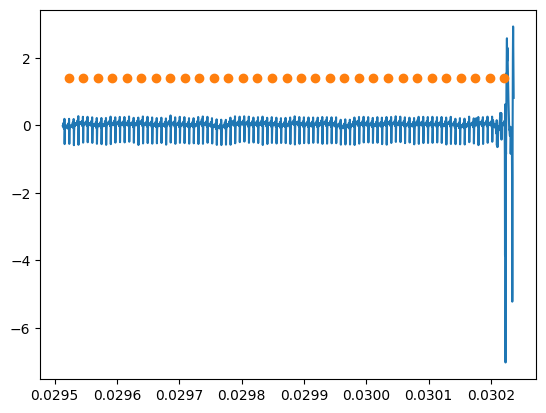

In [116]:
#ECG&CO Visualization
plt.plot(temp_t,temp_ECG)
#plt.plot(temp_t,temp_PPG)
plt.plot(temp_tCO,CO[tCO1_idx:tCO2_idx],'o')

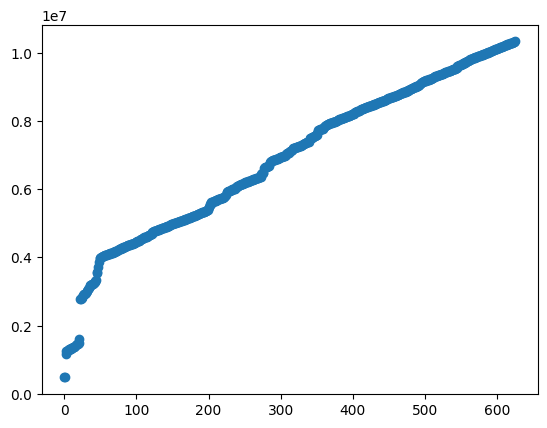

In [117]:
#starting point for each section
plt.plot(start_idx,'o')

## markdown 파일

In [4]:
from scipy.io import loadmat
B2B = loadmat('B2B_10196714_221019.mat')

In [5]:
B2B = B2B['B2B'][0][0]

In [6]:
B2B_key = B2B.dtype.names
B2B_key

('ecg_r',
 'sqi',
 'sqi_ECG_dHV',
 'sqi_ECG_Ramp',
 'sqi_ABP_min',
 'sqi_ABP_max',
 'sqi_ABP_dBP',
 'sqi_ABP_FFTsum',
 'sqi_ABP_XcorrR',
 'sqi_PPG_XcorrR',
 'sqi_PPG_SE',
 'sqi_PPG_dAmp',
 'sqi_PPG_np',
 'sqi_PPG_fft_sum')

In [7]:
B2B['ecg_r']

array([[  150230,   150273,   150344, ..., 10346486, 10346557, 10346629],
       [  150273,   150344,   150503, ..., 10346557, 10346629, 10346701]])

In [9]:
B2B_ECG_diff = B2B['ecg_r'][1] - B2B['ecg_r'][0]

(array([     0.,    514.,   1167.,   5815., 100080.,  31311.,    309.,
           658.,    649.,    360.]),
 array([ 25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105., 115., 125.]),
 <BarContainer object of 10 artists>)

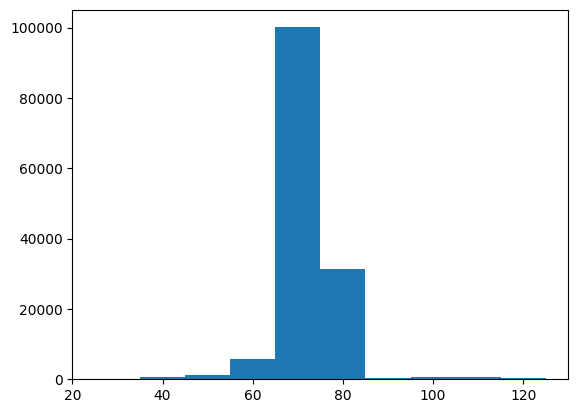

In [14]:
from matplotlib import pyplot as plt
plt.hist(B2B_ECG_diff, range=(25,125))